In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

import yfinance as yf

#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 

In [3]:
ETH = yf.Ticker("ETH-USD")

In [4]:
ETH = ETH.history(period = "max")
ETH

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.0,0.0
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.0,0.0
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.0,0.0
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.0,0.0
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-19 00:00:00+00:00,3619.582031,3717.662354,3330.872559,3417.927979,58879190250,0.0,0.0
2024-12-20 00:00:00+00:00,3417.930176,3496.327393,3098.203613,3472.553467,66383827229,0.0,0.0
2024-12-21 00:00:00+00:00,3472.589111,3552.921631,3293.505615,3337.222412,31579389836,0.0,0.0


In [5]:
ETH.index

DatetimeIndex(['2017-11-09 00:00:00+00:00', '2017-11-10 00:00:00+00:00',
               '2017-11-11 00:00:00+00:00', '2017-11-12 00:00:00+00:00',
               '2017-11-13 00:00:00+00:00', '2017-11-14 00:00:00+00:00',
               '2017-11-15 00:00:00+00:00', '2017-11-16 00:00:00+00:00',
               '2017-11-17 00:00:00+00:00', '2017-11-18 00:00:00+00:00',
               ...
               '2024-12-14 00:00:00+00:00', '2024-12-15 00:00:00+00:00',
               '2024-12-16 00:00:00+00:00', '2024-12-17 00:00:00+00:00',
               '2024-12-18 00:00:00+00:00', '2024-12-19 00:00:00+00:00',
               '2024-12-20 00:00:00+00:00', '2024-12-21 00:00:00+00:00',
               '2024-12-22 00:00:00+00:00', '2024-12-23 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=2602, freq=None)

<Axes: xlabel='Date'>

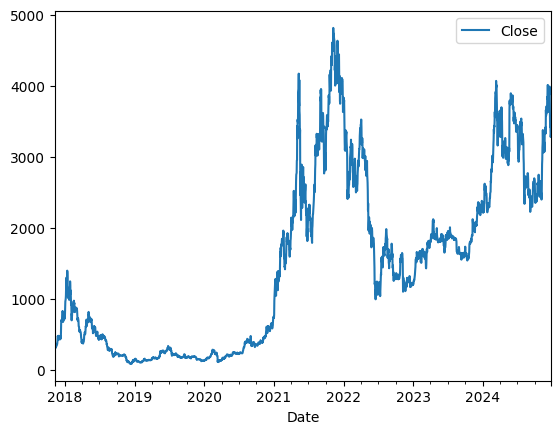

In [6]:
ETH.plot.line(y="Close",use_index=True)

In [7]:
ETH = ETH.drop(['Dividends','Stock Splits'],axis= "columns")

In [8]:
ETH.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984
2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984
2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992
2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936
2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984


In [9]:
ETH["Tomorrow"] = ETH["Close"].shift(-1)

In [10]:
ETH["Target"]= (ETH["Tomorrow"]>ETH["Close"]).astype(int)

In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
from sklearn.model_selection import train_test_split
train, test = train_test_split(ETH, test_size=0.2, random_state=42)

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [28]:
model.score(test[predictors], test["Target"])

np.float64(0.48249027237354086)

In [52]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

np.float64(0.48249027237354086)

<Axes: xlabel='Date'>

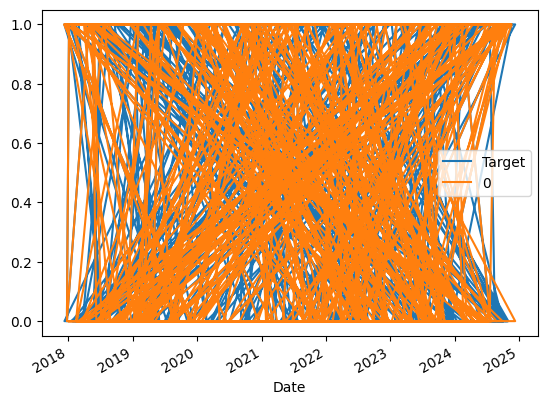

In [53]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [57]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [59]:
def backtest(data, model, predictors, start=1825, step=365):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [60]:
predictions = backtest(ETH, model, predictors)

In [61]:
predictions["Predictions"].value_counts()

Predictions
0    539
1    238
Name: count, dtype: int64

In [62]:
precision_score(predictions["Target"], predictions["Predictions"])

np.float64(0.5378151260504201)